In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = 'd:/Git_Proyects/Tesis/Base_Twitter/Tw_meses/'

In [2]:
Tw = pd.read_csv(path+'Tweets_Agosto.csv')

C:\Users\Ale\AppData\Local\Temp\ipykernel_15536\2900787566.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  Tw = pd.read_csv(path+'Tweets_Agosto.csv')


In [3]:
Tw = Tw.dropna(subset=['Tweets'])
Tw = Tw.dropna(subset=['Fecha'])
len(Tw)

6907084

In [4]:
Tw['Fecha'] = pd.to_datetime(Tw['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y', errors='coerce')

In [5]:
df_index = Tw.set_index('Fecha')
df_count_hora = df_index.resample('1H').count()
df_suavizado = df_count_hora.rolling('1D', center = True).mean()


In [6]:
df_count_hora.rename(columns={'id':'Cuentas_Tot'}, inplace=True)
Agosto_tot_hora = pd.DataFrame(df_count_hora['Cuentas_Tot'])
Agosto_tot_hora.to_csv(path+'Agosto_tot_hora.csv')
a = pd.read_csv(path+'Agosto_tot_hora.csv')
a.set_index('Fecha')

,Cuentas_Tot
Fecha,
2019-08-01 03:00:00,142
2019-08-01 04:00:00,5962
2019-08-01 05:00:00,3905
2019-08-01 06:00:00,2490
2019-08-01 07:00:00,1829
...,...
2019-08-31 23:00:00,9821
2019-09-01 00:00:00,8869
2019-09-01 01:00:00,8040


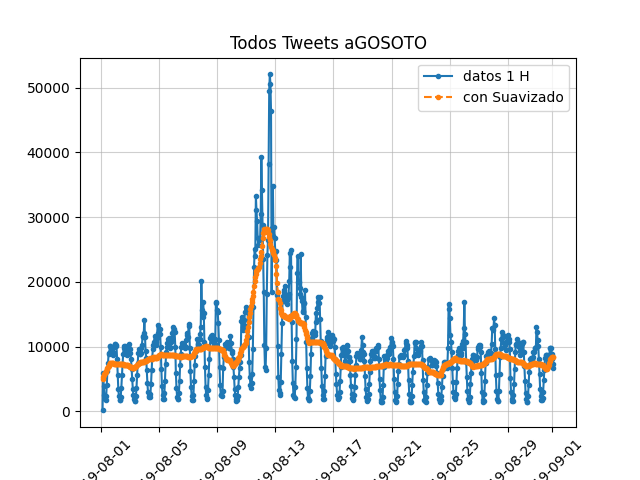

In [9]:
%matplotlib widget

plt.figure()
plt.title('Todos Tweets aGOSOTO')

plt.plot(df_count_hora.index, df_count_hora['Tweets'], '.-', label  = 'datos 1 H')
plt.plot(df_suavizado.index, df_suavizado['Tweets'], '.--', label = 'con Suavizado')
plt.legend()
plt.grid(alpha = 0.6)
#plt.yscale('log')
plt.xticks(rotation = 45)
#plt.savefig(path+'Todos_datos_marzo.png', dpi = 1000)
plt.show()

In [7]:
df_count_hora.index

DatetimeIndex(['2019-10-01 03:00:00', '2019-10-01 04:00:00',
               '2019-10-01 05:00:00', '2019-10-01 06:00:00',
               '2019-10-01 07:00:00', '2019-10-01 08:00:00',
               '2019-10-01 09:00:00', '2019-10-01 10:00:00',
               '2019-10-01 11:00:00', '2019-10-01 12:00:00',
               ...
               '2019-10-29 16:00:00', '2019-10-29 17:00:00',
               '2019-10-29 18:00:00', '2019-10-29 19:00:00',
               '2019-10-29 20:00:00', '2019-10-29 21:00:00',
               '2019-10-29 22:00:00', '2019-10-29 23:00:00',
               '2019-10-30 00:00:00', '2019-10-30 01:00:00'],
              dtype='datetime64[ns]', name='Fecha', length=695, freq=None)

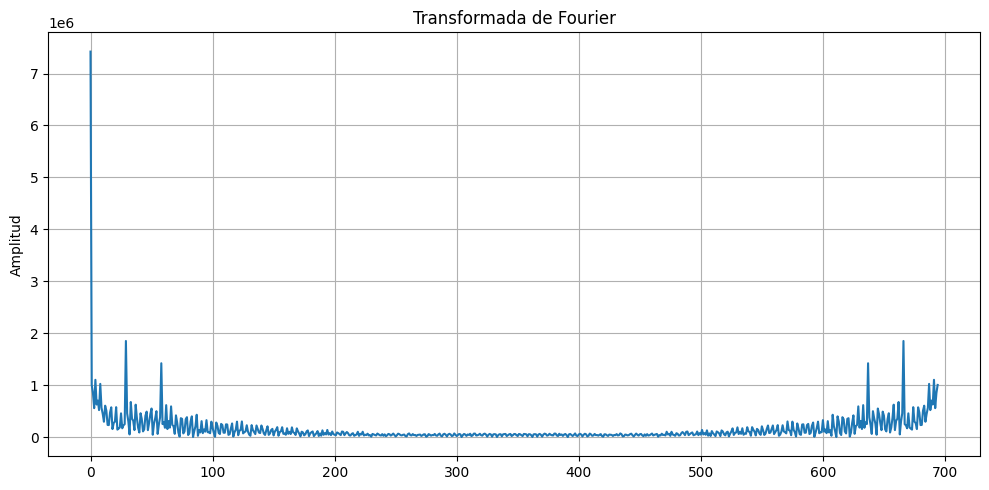

In [11]:
transformada = np.fft.fft(df_count_hora['Tweets'])
frecuencias = np.fft.fftfreq(len(df_count_hora), 1)
plt.figure(figsize=(10, 5))
plt.plot(np.abs(transformada))
#plt.plot(frecuencias, np.abs(transformada))
plt.title('Transformada de Fourier')
#plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
#plt.xlim(0, 0.5)  # Puedes ajustar el rango de frecuencias según tus necesidades
plt.grid()

plt.tight_layout()
plt.show() 

In [32]:
np.where(np.array(df_count_hora['Tweets'])>400000)

(array([13, 20, 27], dtype=int64),)

In [33]:
df_count_hora.index[27]

Timestamp('2019-10-28 00:00:00')